In [1]:
import numpy as np
import pandas as pd

In [3]:
df_train = pd.read_csv("MNIST dataset/mnist_train.csv")
df_test = pd.read_csv("MNIST dataset/mnist_test.csv")

In [4]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from tensorflow import keras 

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [27]:
from tensorflow import keras

In [28]:
from tensorflow.keras.datasets import mnist 

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [30]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

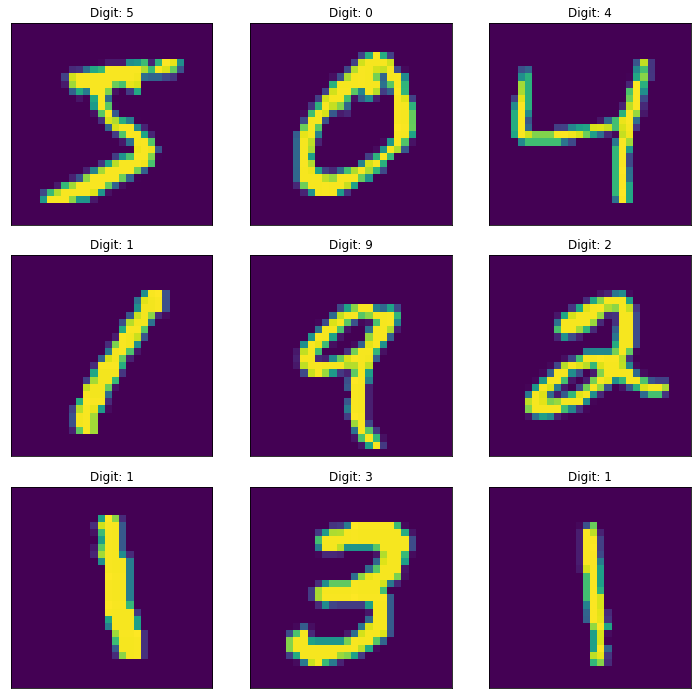

In [32]:
plt.figure(figsize = (10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    plt.imshow(X_train[i], interpolation = 'none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
    

In [33]:
X_train.shape

(60000, 28, 28)

In [36]:
X_train.shape[0]

60000

In [37]:
img_rows = X_train.shape[1]

In [38]:
img_columns = X_train.shape[2]

In [39]:
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_columns)

In [40]:
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_columns)

In [41]:
X_train.shape

(60000, 1, 28, 28)

In [43]:
X_test.shape

(10000, 1, 28, 28)

In [44]:
type(X_train)

numpy.ndarray

In [45]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [47]:
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (60000, 1, 28, 28)
X_test shape: (10000, 1, 28, 28)


In [51]:
number_of_categories = 10
y_train = keras.utils.to_categorical(y_train, number_of_categories)
y_test = keras.utils.to_categorical(y_test, number_of_categories)

In [53]:
len(y_train)

60000

In [54]:
len(y_test)

10000

In [56]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),
                activation = 'relu',
                input_shape = input_shape))

NameError: name 'Conv2D' is not defined